In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Original dataset shape: {X.shape}")

Original dataset shape: (150, 4)


In [3]:
# Convert to DataFrame for better visualization of feature names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# Using stratify=y ensures that the proportion of target classes is the same in both train and test sets

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (112, 4)
Testing set shape: (38, 4)


In [6]:
# 3. Standardize the features
# PCA is affected by scale, so it's crucial to standardize the features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# --- Machine Learning without PCA ---
print("\n--- Training KNN without PCA ---")
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)

accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")
print("Classification Report without PCA:")
print(classification_report(y_test, y_pred_no_pca, target_names=target_names))
print("Confusion Matrix without PCA:")
print(confusion_matrix(y_test, y_pred_no_pca))


--- Training KNN without PCA ---
Accuracy without PCA: 0.9211
Classification Report without PCA:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38

Confusion Matrix without PCA:
[[12  0  0]
 [ 0 13  0]
 [ 0  3 10]]


In [ ]:
# --- Machine Learning with PCA ---
print("\n--- Training KNN with PCA ---")

In [8]:
# 4. Apply PCA
# We'll reduce the dimensionality to 2 components for visualization purposes.
# In a real scenario, you might choose the number of components based on explained variance ratio.
pca = PCA(n_components=2) # Reduce to 2 principal components

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA-transformed training set shape: {X_train_pca.shape}")
print(f"PCA-transformed testing set shape: {X_test_pca.shape}")

# Explained variance ratio
print(f"Explained variance ratio by principal components: {pca.explained_variance_ratio_}")
print(f"Total explained variance by 2 components: {pca.explained_variance_ratio_.sum():.4f}")

PCA-transformed training set shape: (112, 2)
PCA-transformed testing set shape: (38, 2)
Explained variance ratio by principal components: [0.73911238 0.22125712]
Total explained variance by 2 components: 0.9604


In [9]:
# 5. Train a K-Nearest Neighbors classifier on the PCA-transformed data
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)
y_pred_with_pca = knn_with_pca.predict(X_test_pca)

In [10]:
# 6. Evaluate the performance with PCA
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)
print(f"Accuracy with PCA (2 components): {accuracy_with_pca:.4f}")
print("Classification Report with PCA (2 components):")
print(classification_report(y_test, y_pred_with_pca, target_names=target_names))
print("Confusion Matrix with PCA (2 components):")
print(confusion_matrix(y_test, y_pred_with_pca))

Accuracy with PCA (2 components): 0.8947
Classification Report with PCA (2 components):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38

Confusion Matrix with PCA (2 components):
[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]


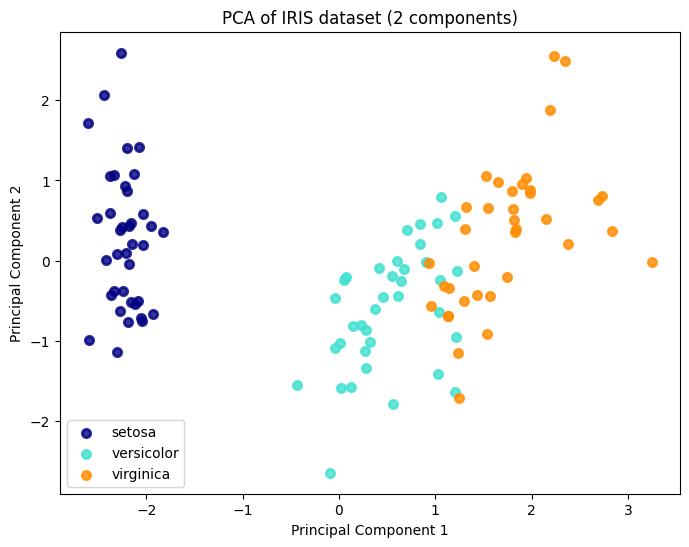

In [11]:
# --- Visualization (for 2 components) ---
if pca.n_components == 2:
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS dataset (2 components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [12]:

# You can experiment with a different number of components
# For example, to keep 95% of the variance:
pca_full = PCA(n_components=0.95)
X_train_pca_full = pca_full.fit_transform(X_train_scaled)
X_test_pca_full = pca_full.transform(X_test_scaled)
print(f"\nNumber of components to retain 95% variance: {pca_full.n_components_}")
# Train and evaluate a classifier on X_train_pca_full


Number of components to retain 95% variance: 2


In [14]:
# Train a K-Nearest Neighbors classifier on the PCA-transformed data
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca_full, y_train)
y_pred_with_pca_full = knn_with_pca.predict(X_test_pca_full)

In [15]:
# Evaluate the performance with PCA
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca_full)
print(f"Accuracy with PCA (2 components): {accuracy_with_pca:.4f}")
print("Classification Report with PCA (2 components):")
print(classification_report(y_test, y_pred_with_pca_full, target_names=target_names))
print("Confusion Matrix with PCA (2 components):")
print(confusion_matrix(y_test, y_pred_with_pca_full))

Accuracy with PCA (2 components): 0.8947
Classification Report with PCA (2 components):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38

Confusion Matrix with PCA (2 components):
[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]
